# Simple Linear Regression (SLR) 1

## What We'll Accomplish in This Notebook

<ul>
    <li>Introduce the idea behind regression tasks.</li>
    <li>Introduce the simple linear regression model with baseball data.</li>
    <li>Start learning about more general machine learning/data science principles including:</li>
        <ul>
            <li>The statistical learning framework,</li>
            <li>The train test split, and</li>
            <li>Loss or cost functions.</li>
        </ul>
    <li>Have you build a simple linear regression model to predict carseat sales.</li>
</ul>

Let's Get Started! First we'll import the needed packages.

In [1]:
# As will become standard in all notebooks
# we will import the following packages 
# We'll use these throughout the notebook so it is
# good practice to import them before we get started

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

Today's notebook will be slightly different. Since this is our first step into the world of data science and machine learning we'll have to clear the brush a bit and introduce some machine learning concepts that will apply to all of our supervised learning methods. This means slightly more lecturing than normal.

## What is Regression?

### A Statistical Learning Framework

Before discussing regression let's take a step back and talk about the more general <i>Statistical Learning</i> framework that encompasses regression in the light of <i>predictive modeling</i>.

Suppose there is something that you'd like to predict. For example movie revenue given the film's budget. 

In [2]:
movies = pd.read_csv("movies.csv")

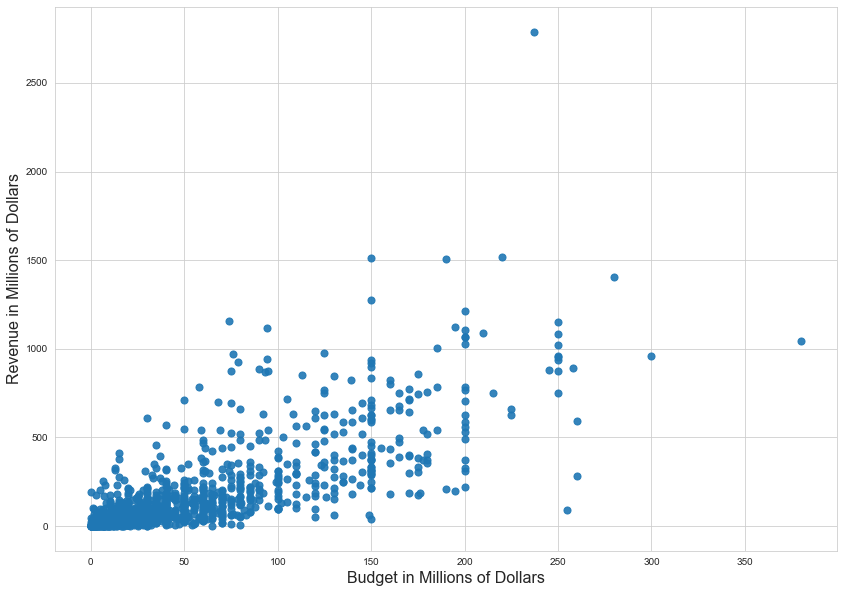

In [3]:
plt.figure(figsize = (14,10))

plt.scatter(movies.budget/(10**6),movies.revenue/(10**6),alpha=.9,s=50)

plt.xlabel("Budget in Millions of Dollars",fontsize = 16)
plt.ylabel("Revenue in Millions of Dollars",fontsize = 16)

plt.show()

Or maybe predict a college's graduation rate given their student to faculty ratio.

In [ ]:
college = pd.read_csv("college.csv")

In [ ]:
plt.figure(figsize = (14,10))

plt.scatter(college['s_f_ratio'],college['grad_rate'],s=50)

plt.xlabel("Student Faculty Ratio",fontsize = 16)
plt.ylabel("Graduation Rate (%)",fontsize = 16)

plt.show()

One way to approach these problems is to use statistical learning. In general we call the thing we want to predict $y$ and collect all of the data we'll use to predict $y$ into a matrix $X$ called the <i>feature matrix</i>. 

The idea behind statistical learning is that there is some true relationship between $X$ and $y$ that is obscured by random noise. This leads to a statistical model:
$$
y = f(X) + \epsilon,
$$
where $\epsilon$ is random noise with mean zero.

Let's illustrate this with a picture.

In [ ]:
# make some data
# x is evenly spaced from (-5,5)
x = np.linspace(-5,5,100)

# y is f(x) + random noise
y = 1/(1+np.exp(-x)) +  .08*np.random.randn(100)

The True Relationship Above is:
$$
y = \frac{1}{1+e^{-x}}, \text{ so } f(x) = \frac{1}{1+e^{-x}}
$$

In [ ]:
# plot the data
# make the figure
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=True)

# plot the truth
ax[0].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=1,label="True Relationship")

# plot the data and the truth in the middle
ax[1].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=.6,label="True Relationship")
ax[1].scatter(x,y,label = "Observed Data")

# plot a sample estimate function on right
ax[2].plot(x,.9/(1+.8*np.exp(-x))+.025,linewidth = 3,c='r',label="Estimated Relationship")
ax[2].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=.4,label="True Relationship")
ax[2].scatter(x,y,alpha=.8,label = "Observed Date")

# Set titles and label
ax[0].set_title("The Hidden Truth",fontsize=18)
ax[0].set_xlabel("X",fontsize=16)
ax[0].set_ylabel("y",fontsize=16)

ax[1].set_title("The Data, What We See",fontsize=18)
ax[1].set_xlabel("X",fontsize=16)
ax[1].set_ylabel("y",fontsize=16)

ax[2].set_title("The Estimate, Our Best Guess",fontsize=18)
ax[2].set_xlabel("X",fontsize=16)
ax[2].set_ylabel("y",fontsize=16)

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

Our goal is to get as close as we can to the true relationship using the data we collect. Statistical Learning is all about estimating the true relationship the best we can. 

We often call the estimate of the relationship $\hat{f}$. We'll see what it means to estimate this <i>the best we can</i> in a bit.

### Just Answer the Question Already, What is Regression?

In the world of predictive modeling, <b>regression</b> is a name we give problems where we'd like to estimate $f$ for quantitative $y$ data. So our first two examples, the movie revenue and the graduation rate would be regression problems. In these problems we often say that we're <i>regressing $y$ on $X$</i>.

## Question Break!

Let's break for one or two minutes, I'll answer a couple of questions about what we just went over, and you can take a quick reddit break. Then we'll refocus for the next chunk on regression.


<br>
<br>
<br>
<br>

## Break Over!

Alright let's now talk about our first regression method.

## Simple Linear Regression

We'll learn the method by solving a specific problem.

You work for ESPN and you think that you can predict a baseball team's win total if you know their run differential. 

<i>For non-baseball fans a run is considered $1$ point in baseball, and run differential is the number of runs your team scores, denoted as $r$, minus the number of runs your team gave up, denoted as $ra$ for runs allowed, so run differential is $rd = r - ra$.</i>

This is a regression problem, we want to predict a quantitative outcome, wins, using some feature, run differential.

Let's look at some data.

In [ ]:
# Use pandas to import the data
# it is stored in the baseball_run_diff.csv file
baseball = pd.read_csv("baseball_run_diff.csv")


# This will tell us about the df
print("There are",len(baseball),"observations in the baseball df.")
print("The columns are",list(baseball.columns))

# Look at 5 randomly sampled rows
baseball.sample(5)

##### ML Aside - First Step in ML Data Handling, Train Test Split

We've imported the baseball data we'll need. Now you may be tempted to start exploring this data. However, since we'll be building a predictive model on top of it we want to set aside a small subset of the data aside for testing purposes. This is known as making the <i>train test split</i>.

The <i>train set</i> is the one we build our model on. A machine learning algorithm uses the train set to estimate the true relationship the best it can. 

<b>But what do we really care about? Making good predictions.</b> 

Good performance on the training data does not guarantee good predictive performance. So in order to get a sense of how good a particular model is we set aside a <i>test set</i> at the beginning of the model building process. This subset of the total data set is meant to allow you to test your model on data it didn't train on, therefore allowing you to simulate predicting on entirely new data. Typically this data isn't touched until the end of the model building process.

##### ML Aside Over

So let's use `pandas` to make our train test split.

In [ ]:
# first make a copy of the original dataframe
# this is due to the way python internally 
# stores objects
baseball_copy = baseball.copy()

# Now use sample to make a random sample
# frac allows us to choose a fraction of the df
# it is common to set aside 25% for testing
baseball_train = baseball_copy.sample(frac = .75, random_state = 440)

# now use drop and the train index to make test
baseball_test = baseball_copy.drop(baseball_train.index)

In [ ]:
# Now look at the training set head
baseball_train.head(10)

Now we can explore!

Let's examine any potential relationship between wins (coded as `W`) and run differential (coded as `RD`).

In [ ]:
# We'll use plt.scatter for this

# first make a figure
# this makes a figure that is 10 units by 10 units
plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Run Differential", fontsize =16)

# place a ylabel
plt.ylabel("Wins", fontsize = 16)

# type this to show the plot
plt.show()

##### Write Something

Let's take a moment to describe what relationship you see between run differential and wins. This will help us determine an appropriate model.







Let's use that relationship we just discussed.

### The SLR Model

Copying the notation of our dataframe let $w$ denote wins and $rd$ denote run differential, also assume we have $n$ observations. 

For Simple Linear Regression we model the true relationship as a straight line, let the subscript $i$ denote the $i_{\text{th}}$ observation:
$$
w_i = \beta_0 + \beta_1 rd_i + \epsilon_i,
$$
here $\beta_0$ and $\beta_1$ are coefficients we'll need to estimate, and $\epsilon_i$ is random noise assumed to be an independent normally distributed with mean $0$ and standard deviation $\sigma$. Note that we assume the same formula holds for all observations.

#### Estimating the Model - What is "Best"

We need to choose $\beta_0$ and $\beta_1$ so that the line we produce is the "best", but what does "best" mean. In general it means that we don't want our estimated line to be too far from the data. A common measure used in regression problems is the <i>Mean Square Error (MSE)</i> or equivalently the <i>Root Mean Square Error</i> (=$\sqrt{\text{MSE}}$). 

Suppose that we decide that $\hat{\beta_0}$ and $\hat{\beta_1}$ are the best estimates, then the MSE for those estimates is
$$
MSE = \frac{1}{n}\sum_{i=1}^n(\hat{w_i} - w_i)^2 = \frac{1}{n}\sum_{i=1}^n(\hat{\beta_0} + \hat{\beta_1}rd_i - w_i)^2.
$$
The "best" estimates will be the $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the MSE. Doing some Calculus you can derive that this gives the following best linear estimates for the $\hat{\beta}$s:
$$
\hat{\beta_1} = \frac{\sum_{i=1}^n\left(rd_i - \overline{rd}\right)\left(w_i - \overline{w}\right)}{\sum_{i=1}^n\left(rd_i - \overline{rd}\right)^2} = \frac{\text{cov}(rd,w)}{\sigma^2_{rd}}, \text{ and}
$$
<br>
$$
\hat{\beta_0} = \overline{w} - \hat{\beta_1}\overline{rd}.
$$
These two formulas give the <i>least squares coefficient estimates</i> for simple linear regression.

Let's do a little coding and calculate the least squares estimate for regressing wins on run differential.

In [ ]:
## Note you can get a column's variance using .var()
## Note you can get a covariance matrix from a dataframe using .cov()

# Get the means here
w_mean = baseball_train.W.mean()
rd_mean = baseball_train.RD.mean()


# Get the covariance and variance
cov = baseball_train[['W','RD']].cov().iloc[0,1]
rd_var = baseball_train.RD.var()

# Calculate beta_1_hat
beta_1_hat = cov/rd_var

# Calculate beta_0_hat
beta_0_hat = w_mean - beta_1_hat * rd_mean

In [ ]:
## We can produce a plot with the fitted line here
## Now produce a plot with the samples and the fitted SLR line

## Use the x as the input for your line, i.e. beta_0_hat + beta_1_hat*x
min_rd = baseball_train.RD.min()
max_rd = baseball_train.RD.max()
padding = 20
x = np.linspace(min_rd - padding,max_rd + padding,1000)



## Sample Answer
plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W, label = "observations")

# Now add mean prediction line
plt.plot(np.linspace(min_rd - padding,max_rd + padding,1000),
            beta_0_hat + beta_1_hat*np.linspace(min_rd - padding,max_rd + padding,1000), 'k',
            label="SLR Line",
            linewidth = 2)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Run Differential", fontsize =16)

# place a ylabel
plt.ylabel("Wins", fontsize = 16)

# Add a legend
plt.legend(fontsize=14)

# type this to show the plot
plt.show()

##### ML Aside

MSE is just one example of what is called a <i>loss function</i> or <i>cost function</i>. In Machine Learning problems we often fit our models by minimizing the loss function. For example, to find the $\beta_0$ and $\beta_1$ estimates we minimized MSE. We'll see many examples of loss functions as we go along in the course.

##### Aside Over

## Break Time!

Let's take another short break! I'll answer some questions via the chat, and you can feel free to check gmail or play a quick game of minesweeper. I'll warn you when we're ready to get going again.

<br>
<br>
<br>
<br>

## Break Over!


#### `sklearn` and `seaborn` Shortcuts

Now that we did all that work let's see a couple of shortcuts.

In [ ]:
## Model Building with sklearn

# first we import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Now we make a model object
slr = LinearRegression(copy_X = True)

# Now we fit the model
# first goes the input variables
# Then the output variables
# If the input is a 1-D vector you need to reshape it
# Then you need to ravel() the output
slr.fit(baseball_train['RD'].values.reshape(-1,1), baseball_train['W'].values.ravel())

In [ ]:
# Now we can see the coefficients
print("beta_1_hat is", slr.coef_[0])
print("beta_0_hat is", slr.intercept_)

print()

# Let's compare that to what we computed
print("We computed beta_1_hat to be", beta_1_hat)
print("We compute beta_0_hat to be", beta_0_hat)

In [ ]:
# We can make predictions like so
min_rd = baseball_train.RD.min()
max_rd = baseball_train.RD.max()
padding = 20
x = np.linspace(min_rd - padding,max_rd + padding,10)

slr.predict(x.reshape(-1,1))

`sklearn` is <b>the</b> Python machine learning library. As we go throught the course we'll be relying heavily on `sklearn`. The pattern we just showed is the common `sklearn` pattern, import the model, make a model object, fit the object, then predict. To learn more about the `LinearRegression` object read the documentation here: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

Now let's introduce a nice plotting shortcut.

In [ ]:
## Now we can have a nice plotting shortcut too

# seaborn lmplot stands for 
# linear model plot
# it makes a scatter plot and plots the regression plot over it
# height controls the size of the plot
# ci stands for confidence interval, we'll come back to that later
sns.lmplot(data = baseball_train, x = 'RD', y = 'W', height = 10, ci=None)


plt.xlabel("Run Differential", fontsize = 16)
plt.ylabel("Wins", fontsize = 16)

plt.show()

`seaborn` is an excellent plotting library. We'll leave it to you to explore it separately. Here is the documentation page <a href="https://seaborn.pydata.org/index.html">https://seaborn.pydata.org/index.html</a>, and here is a nice tutorial using pokemon data to help teach various plots, <a href="https://elitedatascience.com/python-seaborn-tutorial">https://elitedatascience.com/python-seaborn-tutorial</a>.


### Interpreting the Coeficient of SLR

A nice thing about SLR is that we can interpret the $\beta_1$ coefficient in a meaningful way. If for example $\hat{\beta_1} = 2$ in the run differential problem we could say that for a $1$ point increase in run differential we estimate an increase of $2$ wins.

In [ ]:
# A print statement that interprets the 
# best linear estimate of beta_1 here
print("A 1 point increase in run differential gives an estimated",
         np.round(beta_1_hat,4),
          "additional wins.")


print("So we estimate that a team needs a",
         np.round(1/beta_1_hat,1),
          "point run differential increase for 1 additional win.")

#### Training and Testing Performance

Before setting you loose to work on a Simple Linear Regression problem of your own we can see how to measure the MSE of our model on both the training data and test data.

##### Training Data

It is often useful to compare how good the model fit training data when we are trying to choose a best model. Since there is no other model to choose from, we'll just get some practice coding in python below.

In [ ]:
# Write code to calculate MSE on the training data
# here, you may use either a by hand calculation or
# sklearn
## Sample Answer
def mse(y,y_pred,r):
    return np.round(np.sum((y-y_pred)**2)/len(y),r)

y_train = baseball_train.W.values
y_train_pred = slr.predict(baseball_train.RD.values.reshape(-1,1))

print("The training MSE is",mse(y_train,y_train_pred,4))

##### Testing Data

Since we won't be doing any additional model improvements or model comparisons go ahead and calculate how well we did on the test data.

In [ ]:
# Write code to calculate MSE on the training data
# here, you may use either a by hand calculation or
# sklearn
## Sample Answer
y_test = baseball_test.W.values
y_test_pred = slr.predict(baseball_test.RD.values.reshape(-1,1))


print("The training MSE is",mse(y_test,y_test_pred,4))

## Your Turn

Now it's your turn to practice building a SLR model.

We'll look at the `carseats` data set from Introduction to Statistical Learning in R. This looks at various variables related to the sales of child car seats at $400$ stores. Each row is a store. The thing we'd like to predict is `Sales`. We'll return to this data set in later notebooks. For now try to build a SLR model regressing `Sales` on `Price`. Once you have your model built, interpret the outcome and produce a measure of how good your model is.

In [ ]:
# Read in the data set here
carseats = pd.read_csv("carseats.csv")

In [ ]:
## What do you need to do first before exploring the data?
## Do That here







In [ ]:
## Now explore the data
## plot Price vs Sales and see if 
## a linear regression model makes sense.








In [ ]:
## If you think it is appropriate fit the model here
## You may use sklearn or by hand








In [ ]:
## Make a new plot with your
## Regression Line here
## Does it look like a good fit?








In [ ]:
## Interpret the model here









In [ ]:
## Provide measures of goodness here









## See you in Notebook 2!

That's it for this notebook. You learned:
<ul>
    <li>what SLR is,</li>
    <li>how to fit it,</li>
    <li>and how to interpret the output.</li>
</ul>    
Along the way we introduced ML concepts like:
<ul>
    <li>statistical learning,</li>
    <li>train test splits,</li>
    <li>and loss functions.</li>
</ul>
    
Next we'll wrap up SLR with a few odds and ends. Then we'll move on to extensions on Simple Linear Regression that will allow for even better models.